## OrganiXpert Recommender System
Organic Fertilizer Recommender System

### Loading the necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

### Loading the dataset

In [49]:
df = pd.read_csv('../Data/Organic_Fertilizer_Recommender.csv')
df.head()

,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Organic Fertilizer
0,Sandy,Maize,37,0,0,Safi Biochar
1,Loamy,Sugarcane,12,0,36,Safi Sarvi Planting Fertilizer
2,Black,Cotton,7,9,30,Safi Sarvi Planting Fertilizer
3,Red,Tobacco,22,0,20,Safi Sarvi Planting Fertilizer
4,Clayey,Paddy,35,0,0,Safi Sarvi Topper


In [3]:
df.describe()

,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000
mean,18.909091,3.383838,18.606061
std,11.599693,5.814667,13.476978
min,4.000000,0.000000,0.000000
25%,10.000000,0.000000,9.000000
50%,13.000000,0.000000,19.000000
75%,24.000000,7.500000,30.000000
max,42.000000,19.000000,42.000000


### Histogram to show the distribution of the data

array([[<AxesSubplot:title={'center':'Nitrogen'}>,
        <AxesSubplot:title={'center':'Potassium'}>],
       [<AxesSubplot:title={'center':'Phosphorous'}>, <AxesSubplot:>]],
      dtype=object)

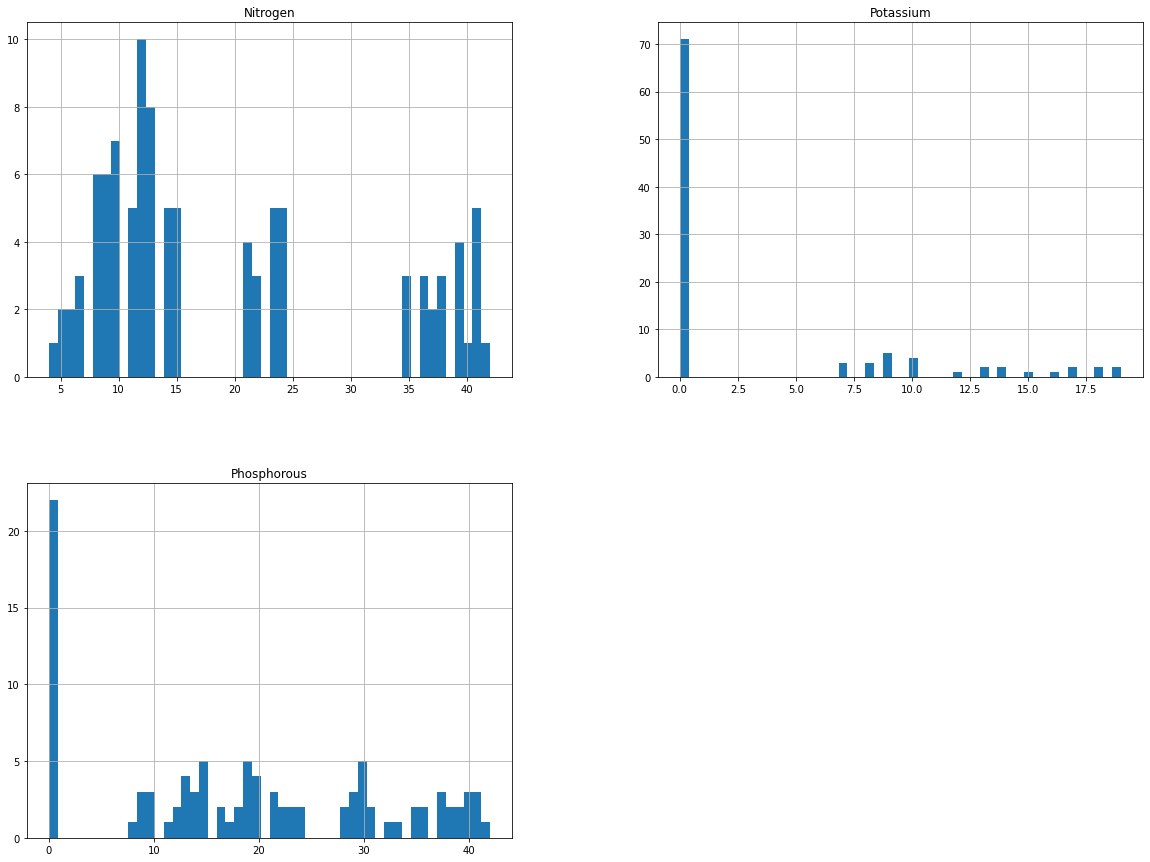

In [4]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))

In [5]:
df.shape

(99, 6)

In [6]:
df.tail()

,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Organic Fertilizer
94,Clayey,Pulses,24,0,19,Safi Sarvi Planting Fertilizer
95,Red,Tobacco,4,17,17,Safi Sarvi Planting Fertilizer
96,Loamy,Wheat,39,0,0,Safi Sarvi Topper
97,Sandy,Millets,15,0,41,Safi Biochar
98,Black,Sugarcane,12,0,10,Safi Sarvi Planting Fertilizer


In [7]:
df.dtypes

Soil Type             object
Crop Type             object
Nitrogen               int64
Potassium              int64
Phosphorous            int64
Organic Fertilizer    object
dtype: object

In [8]:
df.isnull().sum()

Soil Type             0
Crop Type             0
Nitrogen              0
Potassium             0
Phosphorous           0
Organic Fertilizer    0
dtype: int64

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(numerical_features)

['Nitrogen', 'Potassium', 'Phosphorous']


In [10]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print(categorical_features)

['Soil Type', 'Crop Type', 'Organic Fertilizer']


In [11]:
# skew() shows the skewness of the data. If the value is less than -1 or greater than 1, it is highly skewed. If the value is between -1 and -0.5 or between 0.5 and 1, it is moderately skewed. If the value is between -0.5 and 0.5, it is approximately symmetric.
df.skew()

Nitrogen       0.830059
Potassium      1.431726
Phosphorous    0.076162
dtype: float64

In [12]:
# Kurtosis shows the sharpness of the peak of the data. If the value is less than -1 or greater than 1, it is highly peaked. If the value is between -1 and -0.5 or between 0.5 and 1, it is moderately peaked. If the value is between -0.5 and 0.5, it is approximately flat.
df.kurtosis()

Nitrogen      -0.767451
Potassium      0.648266
Phosphorous   -1.138435
dtype: float64

In [50]:
# Rename the Organic Fertilizer column to 'Organic_Fertilizer'
df.rename(columns={'Organic Fertilizer': 'Organic_Fertilizer'}, inplace=True)
df.rename(columns={'Soil Type': 'Soil_Type'}, inplace=True)
df.rename(columns={'Crop Type': 'Crop_Type'}, inplace=True)

In [51]:
df.head()

,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Organic_Fertilizer
0,Sandy,Maize,37,0,0,Safi Biochar
1,Loamy,Sugarcane,12,0,36,Safi Sarvi Planting Fertilizer
2,Black,Cotton,7,9,30,Safi Sarvi Planting Fertilizer
3,Red,Tobacco,22,0,20,Safi Sarvi Planting Fertilizer
4,Clayey,Paddy,35,0,0,Safi Sarvi Topper


### Showing the correlation between the numerical variables

In [15]:
# corr() shows the correlation between the features. If the value is close to 1, it means that the features are highly correlated. If the value is close to 0, it means that the features are not correlated.
corr = df.corr()
print(corr)

             Nitrogen  Potassium  Phosphorous
Nitrogen     1.000000  -0.500087    -0.686971
Potassium   -0.500087   1.000000     0.089192
Phosphorous -0.686971   0.089192     1.000000


In [16]:
print(df['Crop_Type'].value_counts())

Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Oil seeds       7
Barley          7
Tobacco         7
Ground Nuts     7
Maize           6
Name: Crop_Type, dtype: int64


## Distribution of the Data
Determining whether the data is parametric or non-parametric

c:\Users\ronle\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ronle\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log Normal - Nitrogen'}, xlabel='Nitrogen'>

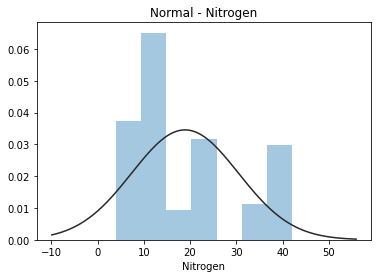

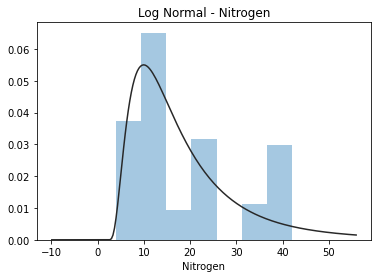

In [17]:
y = df['Nitrogen']
plt.figure(2); plt.title('Normal - Nitrogen')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal - Nitrogen')
sns.distplot(y, kde=False, fit=st.lognorm)

c:\Users\ronle\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ronle\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log Normal- Potassium'}, xlabel='Potassium'>

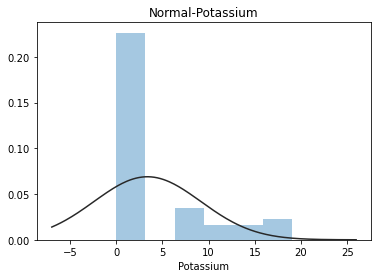

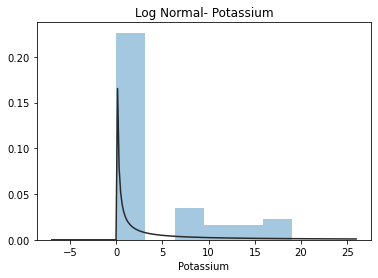

In [18]:
y = df['Potassium']
plt.figure(2); plt.title('Normal-Potassium')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal- Potassium')
sns.distplot(y, kde=False, fit=st.lognorm)

c:\Users\ronle\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ronle\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log Normal-Phosphorous'}, xlabel='Phosphorous'>

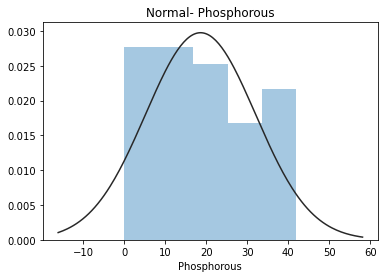

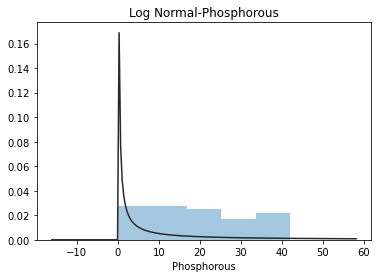

In [19]:
y = df['Phosphorous']
plt.figure(2); plt.title('Normal- Phosphorous')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal-Phosphorous')
sns.distplot(y, kde=False, fit=st.lognorm)

Data appears to be non-parametric as two out of the numerical variables are highly skewed. Phosphorus has a normal distribution.

### Convert the N, P and K values from ppm (parts per million) to kg/ac (kilograms per acre)

In [52]:
# Convert N, P and K ppm values to kg/acre values
# 2.24 is the conversion factor from ppm to kg/ha
# 0.4047 is the conversion factor from kg/ha to kg/acre
df['Nitrogen'] = df['Nitrogen'] * 2.24 * 0.4047
df['Phosphorous'] = df['Phosphorous'] * 2.24 * 0.4047
df['Potassium'] = df['Potassium'] * 2.24 * 0.4047

In [21]:
# Make a copy of the dataframe
df1 = df.copy()

### Using LabelEncoder to convert the categorical variables to numerical variables

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Soil_Type'] = le.fit_transform(df1['Soil_Type'])
df1['Crop_Type'] = le.fit_transform(df1['Crop_Type'])
df1['Organic_Fertilizer'] = le.fit_transform(df1['Organic_Fertilizer'])

### Using MinMaxScaler to scale the numerical variables to a range of 0 to 1

In [23]:
# Normalize N, P and K values to 0-1 range using MinMaxScaler function
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[['Nitrogen', 'Phosphorous', 'Potassium']] = scaler.fit_transform(df1[['Nitrogen', 'Phosphorous', 'Potassium']])
df1.head()

,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Organic_Fertilizer
0,4,3,0.868421,0.000000,0.000000,0
1,2,8,0.210526,0.000000,0.857143,1
2,0,1,0.078947,0.473684,0.714286,1
3,3,9,0.473684,0.000000,0.476190,1
4,1,6,0.815789,0.000000,0.000000,2


### Split the dataframe into training and test set and fit a decision tree algorithm

##### Apply 5-fold cross-validation to compare the accuracy of decision tree and random forest algorithms

In [25]:
# Split the dataset into training and testing sets and use k-fold cross validation to test the following algorithms: decision tree and random forest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
X = df1.drop('Organic_Fertilizer', axis=1)
y = df1['Organic_Fertilizer']
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
dt_scores = cross_val_score(dt_clf, X, y, cv=5)
rf_scores = cross_val_score(rf_clf, X, y, cv=5)
# Print the mean cross validation score for each algorithm
print('Decision Tree:', dt_scores.mean())
print('Random Forest:', rf_scores.mean())

Decision Tree: 0.9073684210526315
Random Forest: 0.9489473684210527
Decision Tree 95% confidence interval: 0.7254914726047006 1.0892453695005624
Random Forest 95% confidence interval: 0.8570845295609625 1.040810207281143


Fit a DecisionTreeClassifier to the training set and predict the test set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
predictions = dt_clf.predict(X_test)
predictions[:10]

array([1, 1, 1, 2, 0, 0, 2, 1, 1, 2])

### Accuracy Score of the Decision Tree Model

In [28]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions))

[[ 4  0  1]
 [ 0 10  0]
 [ 0  0  5]]


In [29]:
# F1 score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00        10
           2       0.83      1.00      0.91         5

    accuracy                           0.95        20
   macro avg       0.94      0.93      0.93        20
weighted avg       0.96      0.95      0.95        20



### Fit a RandomForestClassifier and compare the F1 Score with the Decision tree model

In [30]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
rf_predictions = rf_clf.predict(X_test)
predictions[:10]

array([1, 1, 1, 2, 0, 0, 2, 1, 1, 2])

### Accuracy Score of the RandomForest Model

In [32]:
print(metrics.confusion_matrix(y_test, rf_predictions))

[[ 4  0  1]
 [ 0 10  0]
 [ 0  0  5]]


In [33]:
print(metrics.classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00        10
           2       0.83      1.00      0.91         5

    accuracy                           0.95        20
   macro avg       0.94      0.93      0.93        20
weighted avg       0.96      0.95      0.95        20



### Pickle the randomforest classifier to save it

In [29]:
import pickle
filepath = '../Models/Organic_Fertilizer_Recommender.pkl'
pickle.dump(rf_clf, open(filepath, 'wb'))